# Plotting timeline of weight and final adiposity

Download timeseries for weight and terminate data from the Dropbox/../Figures/Data for Figures. Plot first pannel (A) weigt vs. time and the second pannel (B) final adiposity for all 4 experimental groups

In [2]:
#----------------------------------------------------------
# Import important libraries
#----------------------------------------------------------
import pandas as pd
import numpy as np
import datetime
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp
import matplotlib.dates as mdates
sns.set()

#Set the background and size of the figure
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black', 'font.family': 'Arial'})
plt.rcParams['hatch.linewidth'] = 3
plt.rcParams['figure.dpi'] = 1000

## Download Body Weight data for all of the rats

In [2]:
#----------------------------------------------------------
# Import body weight data
#----------------------------------------------------------
weight_data_location = "https://www.dropbox.com/s/wktthzuhv7vgvox/2018VT%20-%20final%20weight%20log.csv?dl=1"
body_weight = pd.read_csv(weight_data_location).T
body_weight.columns = body_weight.iloc[0]

metafile = body_weight.iloc[1:3].T
body_weight.drop(['Rat', 'Diet', 'Feeding'], inplace = True)
body_weight.head()

Rat,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
17-Sep,41,41,53,41,47,44,43,31,49,43,...,50,45,41,42,43,42,45,40,44,45
18-Sep,47,45,58,45,51,50,46,34,56,49,...,57,53,48,51,51,48,52,48,50,52
19-Sep,54,50,64,50,57,56,53,41,61,56,...,63,59,53,58,58,55,60,53,57,57
20-Sep,58,54,71,54,61,62,58,44,67,61,...,69,65,59,64,61,61,65,59,61,61
21-Sep,64,58,78,59,67,67,63,48,72,66,...,76,71,66,71,67,68,72,67,68,67


## Download parmeters for plotting each group

In [3]:
#----------------------------------------------------------
# Import plotting parameters
#----------------------------------------------------------
plot_data_location = "https://www.dropbox.com/s/djpbvky0mwxpups/plotting_by_group.csv?dl=1"
plot_parameters = pd.read_csv(plot_data_location, index_col=0)
plot_parameters

,color,marker,line_type,hatches,hatch_colors,fill_color,label
group,,,,,,,
control ad lib,grey,o,-,,grey,grey,CA
control restriction,grey,v,--,/,grey,white,CR
HFHS ad lib,red,o,-,,red,red,HA
HFHS restriction,red,v,--,/,red,white,HR


## Loop through Diet and feeding conditions and plot timeline for each group

In [41]:
def plot_weight_vs_time(metafile, body_weight):
    # Separate into subgroups according to diet and food accesibility
    regime = metafile.Feeding.unique()
    diet   = metafile.Diet.unique()
    days = np.arange(0, body_weight.shape[0])
    restriction_start = 27
    artists = []
    for x in diet:
        for y in regime:
            group = str(x)+' '+str(y)
            ids = metafile[(metafile.Diet==x) & (metafile.Feeding==y)].index
            weight_series = body_weight[ids]
            line = plt.errorbar(days, weight_series.mean(axis = 1), yerr=weight_series.std(axis = 1)/np.sqrt(weight_series.shape[1]), color = plot_parameters.loc[group].color, marker = 'o', ls=plot_parameters.loc[group].line_type, markevery=5, markersize = 3, capsize=5, errorevery=5, lw = 1)
            plt.axvline(x=restriction_start, ymin=0, ymax=400, color='black', ls ='--')
            artists.append(line)
    plt.xlabel('Days on diet', fontsize=10, fontweight = "bold", color = "black")
    plt.ylabel('Body Weight (g)', fontsize=10, fontweight = "bold", color = "black")
    plt.yticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.xticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.annotate('*', (4.4, 80), fontsize=15, color = 'black', fontweight='bold')
    plt.annotate('#', (44.2, 365), fontsize=10, color = 'gray', fontweight='bold')
    plt.legend(artists, ('Cont\nAL', 'Cont\nRes', 'HFHS\nAL', 'HFHS\nRes'), fontsize = 8.6)
    

## Download terminal data master document

In [42]:
#----------------------------------------------------------
# Import terminal data for adiposity
#----------------------------------------------------------
master_data_location = 'https://www.dropbox.com/s/eu0szifsb9yimo3/2018VT_termination_data_master_document.csv?dl=1'
master_data = pd.read_csv(master_data_location, index_col=0)
# Correct column names
master_data = master_data.rename(columns={" Leptin": "Leptin", "triglyceride (mg/mL)": "Triglyceride"})
master_data['group']=master_data.diet+' '+master_data.feeding_schedule
master_data.head()

,diet,feeding_schedule,liver_weight,total_abdominal_fat,total_gonadal_fat,total_fat_pad,final_BW,Leptin,Cholesterol,Triglyceride,GSP (umol/L),Adiponectin,group
Rat,,,,,,,,,,,,,
1,control,ad lib,17.2,4.6,3.9,8.5,380,1.637628,82.053143,0.942691,112.240742,4.988413,control ad lib
2,control,ad lib,14.0,5.4,3.4,8.8,318,2.032943,103.345415,1.254153,121.759269,4.256736,control ad lib
3,control,ad lib,13.6,5.5,3.5,9.0,351,1.555637,55.869566,0.228261,144.648151,6.666516,control ad lib
4,control,ad lib,14.5,5.2,4.7,9.9,357,2.997072,96.807567,0.407609,155.222252,3.853354,control ad lib
5,control,ad lib,13.5,7.4,5.6,13.0,363,2.704246,81.771341,0.619565,221.916665,4.382227,control ad lib


## Make function to plot final adipocity by group

In [43]:
def make_fat_graph(master_data, plot_parameters):
    ax1 = sns.swarmplot(x=master_data.group, y=master_data.total_fat_pad, color='black', size=3)
    ax = sns.boxplot    (x=master_data.group, y=master_data.total_fat_pad, color='white', linewidth=1, palette=plot_parameters.fill_color, showfliers = False)
    # Make hatched pattern to distinguish between Ad lib and restriction
    for i, hatch, patch in zip(plot_parameters.hatch_colors, plot_parameters.hatches, ax.artists):
        patch.set_hatch(hatch)
        patch.set_edgecolor(i)

    # Add x- and y-labels, ticks, and units
    plt.ylabel('Total Fat Mass (g)', fontsize=10, fontweight = "bold", color = "black")
    plt.xlabel('')
    plt.xticks(range(len(plot_parameters.index)), ('Cont\nAL', 'Cont\nRes', 'HFHS\nAL', 'HFHS\nRes'), fontweight = 'bold', fontsize=10, color = "black")
    plt.yticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.setp(ax.lines, color="black")
    plt.annotate('*', (1.96, 26.8), fontsize=15, color = 'black', fontweight='bold')
    #plt.annotate('*', (2.96, 19.5), fontsize=15, color = 'black', fontweight='bold')
  

## Make final 2-pannel figure for weight and fat

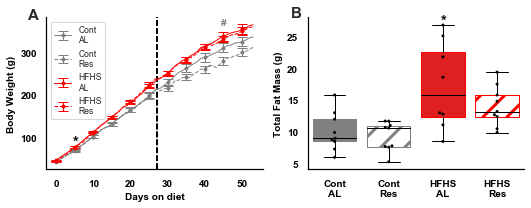

In [44]:
plt.figure(figsize = (7.48, 3.0))
# Created Weight plot
plt.subplot(1,2,1)
plot_weight_vs_time(metafile, body_weight)
plt.text(-7.5, 380, 'A', fontsize=15, fontweight='bold')

# Create Fat graph
plt.subplot(1,2,2)
make_fat_graph(master_data, plot_parameters)
plt.text(-0.8, 28, 'B', fontsize=15, fontweight='bold')

# Clean up and save the figure
sns.despine()
plt.tight_layout()
plt.savefig('Fig1_weight_and_fat.tif', dpi = 1000)
plt.show()